<a href="https://colab.research.google.com/github/Deepakraj14-tamil/Leukemia-Data/blob/main/Leukemia%20-100%25accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [4]:
train_dir = '/content/drive/MyDrive/blood/train'  # Directory containing training images
val_dir = '/content/drive/MyDrive/blood/valid'  # Directory containing validation images
test_dir = '/content/drive/MyDrive/blood/test'  # Directory containing test images


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
train_data = train_datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='binary')
val_data = val_datagen.flow_from_directory(val_dir, target_size=(128, 128), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=32, class_mode='binary')


Found 765 images belonging to 2 classes.
Found 73 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=1e-4), metrics=['accuracy'])


In [9]:
history = model.fit(train_data, epochs=20, validation_data=val_data)


Epoch 1/20
24/24 [==============================] - 56s 2s/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
24/24 [==============================] - 33s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
24/24 [==============================] - 33s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
24/24 [==============================] - 32s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
24/24 [==============================] - 32s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
24/24 [==============================] - 32s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
24/24 [==============================] - 32s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.

In [10]:
test_loss, test_acc = model.evaluate(test_data)

2/2 [==============================] - 1s 334ms/step - loss: 0.0000e+00 - accuracy: 1.0000


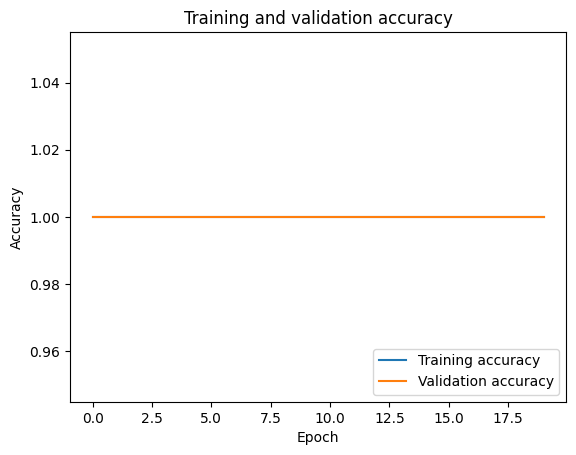

In [14]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [16]:
y_pred_prob = model.predict(test_data)

2/2 [==============================] - 1s 39ms/step


In [17]:
fpr, tpr, thresholds = roc_curve(test_data.classes, y_pred_prob)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [18]:
roc_auc = auc(fpr, tpr)

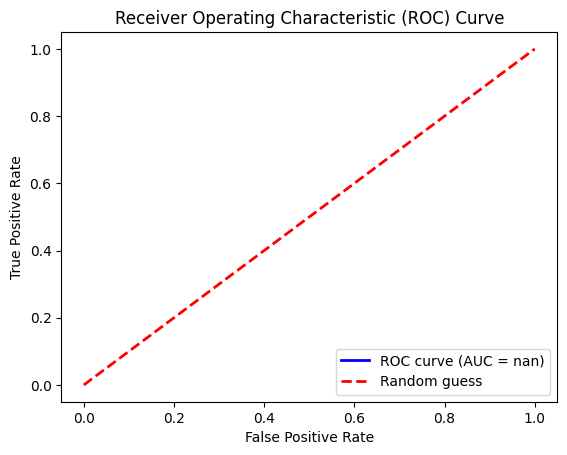

In [19]:
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [23]:
y_pred_prob = model.predict(test_data)


2/2 [==============================] - 0s 37ms/step


In [24]:
y_pred = np.argmax(y_pred_prob, axis=1)

In [25]:
cm = confusion_matrix(test_data.classes, y_pred)

In [30]:

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[36]]
